<div style="text-align: center; background-color: #b1d1ff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  EDA & Questions
</div>

In [48]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [49]:
cleaned_df = pd.read_csv('../data/processed_data.csv')
cleaned_df.head(10)

,Title,Genre,withDLC,isMature,Developer,Publisher,Languages,PositiveReviews,TotalReviews,NegativeReviews,OriginalPrice,DiscountPercent,DiscountedPrice,ReleaseYear,ReleaseMonth,ReleaseDay,Rating
0,Baldur's Gate 3,"Adventure, RPG, Strategy",1.0,1.0,Larian Studios,Larian Studios,"English, French, German, Spanish - Spain, Poli...",7329.0,8630.0,1134.5,470000.0,0.10,306875.0,2023,8,3,0.82643
1,Counter-Strike 2,"Action, Free to Play",1.0,1.0,Valve,Valve,"English, Czech, Danish, Dutch, Finnish, French...",7329.0,8630.0,1134.5,0.0,0.00,0.0,2012,8,21,0.82643
2,Lethal Company,"Action, Adventure, Indie, Early Access",0.0,1.0,Zeekerss,Zeekerss,English,7329.0,8630.0,1134.5,142000.0,0.00,142000.0,2023,10,23,0.82643
3,Cyberpunk 2077,RPG,1.0,1.0,CD PROJEKT RED,CD PROJEKT RED,"English, French, Italian, German, Spanish - Sp...",7329.0,8630.0,1134.5,470000.0,0.50,306875.0,2020,12,9,0.82643
4,ELDEN RING,"Action, RPG",0.0,1.0,FromSoftware Inc.,FromSoftware Inc.,"English, French, Italian, German, Spanish - Sp...",7329.0,8630.0,1134.5,470000.0,0.40,306875.0,2022,2,24,0.82643
5,Apex Legends™,"Action, Adventure, Free to Play",0.0,0.0,Respawn Entertainment,Electronic Arts,"English, French, Italian, German, Spanish - Sp...",7329.0,8630.0,1134.5,0.0,0.00,0.0,2020,11,4,0.82643
6,Dota 2,"Action, Strategy, Free to Play",1.0,0.0,Valve,Valve,"English, Bulgarian, Czech, Danish, Dutch, Finn...",7329.0,8630.0,1134.5,0.0,0.00,0.0,2013,7,9,0.82643
7,Hogwarts Legacy,"Action, Adventure, RPG",1.0,0.0,Avalanche Software,Warner Bros. Games,"English, French, Italian, German, Spanish - Sp...",7329.0,8630.0,1134.5,470000.0,0.50,306875.0,2023,2,10,0.82643
8,Dead by Daylight,Action,1.0,1.0,Behaviour Interactive Inc.,Behaviour Interactive Inc.,"English, French, Italian, German, Spanish - Sp...",7329.0,8630.0,1134.5,230000.0,0.65,80500.0,2016,6,14,0.82643
9,Project Zomboid,"Indie, RPG, Simulation, Early Access",0.0,0.0,The Indie Stone,The Indie Stone,"English, French, Italian, German, Spanish - Sp...",7329.0,8630.0,1134.5,260000.0,0.33,174200.0,2013,11,8,0.82643


# Kiểm tra tính tương quan của dữ liệu (Correlation)

Kiểm tra tính tương quan dữ liệu giúp ta tìm được các mối quan hệ trong dữ liệu để lọc ra những feature phù hợp cho mô hình dự đoán.

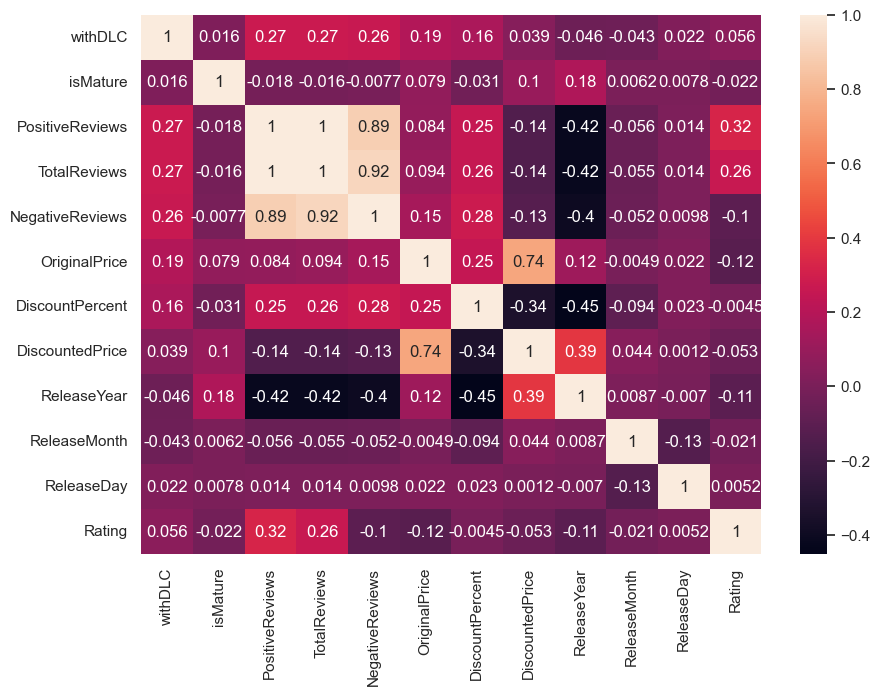

In [50]:
df_copy = cleaned_df.copy()

# calculate correlation matrix
corr_matrix = df_copy.corr(method='spearman', numeric_only=True)

# plot heatmap graph
plt.subplots(figsize=(10,7))
sns.heatmap(corr_matrix, annot=True)
plt.show()


Ta thấy những nơi có tương quan mạnh (cả dương và âm) thường tập trung ở những cột ta đã xét giá trị ngoại lai ở phần **Preprocessing**.
Giờ ta sẽ kiểm tra xem các giá trị này có quan hệ như thế nào.

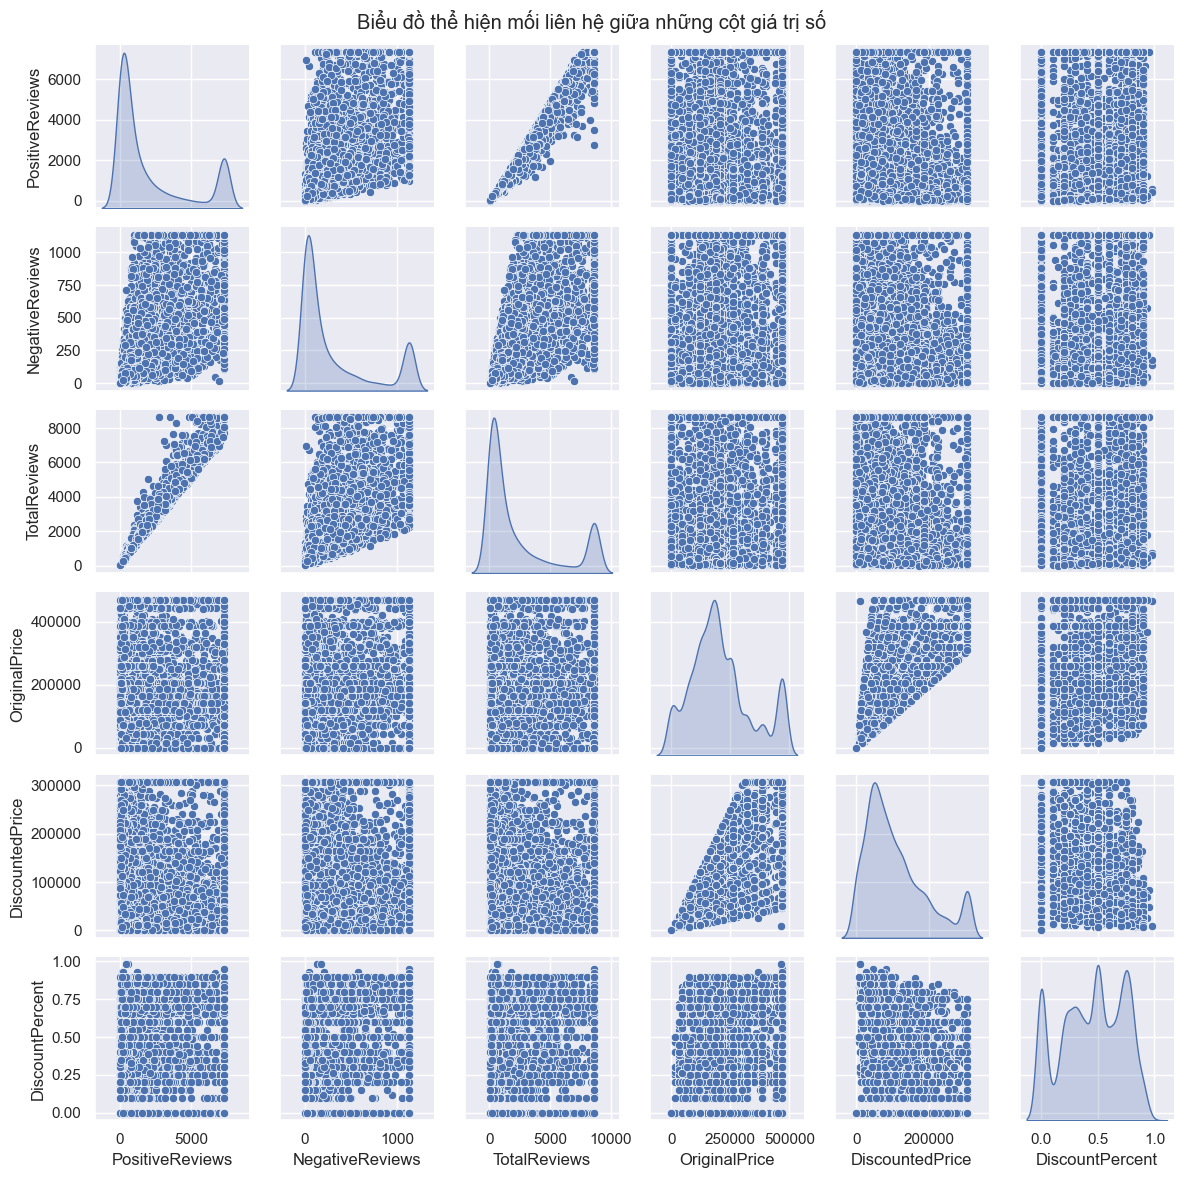

In [51]:
numeric_cols = ['PositiveReviews', 'NegativeReviews', 'TotalReviews', 'OriginalPrice', 'DiscountedPrice', 'DiscountPercent']
sns.set()
cols = numeric_cols
sns.pairplot(cleaned_df[cols], size = 2 ,kind ='scatter',diag_kind='kde')
plt.suptitle('Biểu đồ thể hiện mối liên hệ giữa những cột giá trị số')
plt.tight_layout()
plt.show()

Các thuộc tính `Reviews` khi xét với các thuộc tính liên quan đến giá thành của game thì các điểm phân bố rất hỗn loạn, trong đó `DiscountPercent` hầu như không có mối quan hệ nào với bất kì các cột còn lại.

**`PositiveReviews` và `NegativeReviews` tăng giảm như nào dựa vào số lượng `TotalReviews`?**

Text(0.5, 0.98, 'Biểu đề thể hiện mối quan hệ của NegativeReviews và PositiveReviews')

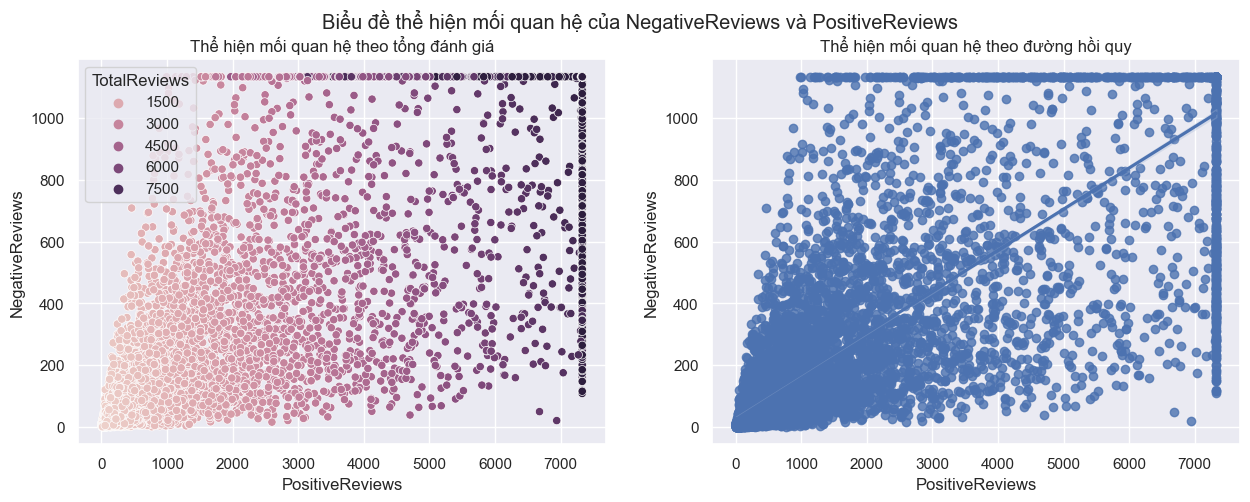

In [52]:
fig, axs = plt.subplots(ncols=2, figsize=(15,5))
sns.scatterplot(x=cleaned_df['PositiveReviews'], y=cleaned_df['NegativeReviews'], hue=cleaned_df['TotalReviews'], ax=axs[0])
sns.regplot(x=cleaned_df['PositiveReviews'], y=cleaned_df['NegativeReviews'], ax=axs[1])
axs[0].set_title('Thể hiện mối quan hệ theo tổng đánh giá')
axs[1].set_title('Thể hiện mối quan hệ theo đường hồi quy')
plt.suptitle('Biểu đề thể hiện mối quan hệ của NegativeReviews và PositiveReviews')

Khi `TotalReviews` ít thì các điểm dữ liệu giữa `NegativeReviews` và `PositiveRevies` nằm sát và chi chít lên nhau, chứng tỏ trong khoảng này nó có mối tương quan mạnh.\
Khi `TotalReviews` ngày càng lớn dần, thì khoảng cách các điểm dữ liệu ngày càng nằm rời rạc và cách xa đường hồi quy, lượng `PositiveReviews` ngày càng tăng trong khi `NegativeReviews` ngày càng giảm.

Ta thử kiếm tra xem mối quan hệ giữa `NegativeReviews` và `PositiveReviews` dựa vào `isMature` và `withDLC` như thế nào:

Text(0.5, 1.0, 'Biểu đề thể hiện mối quan hệ của NegativeReviews và PositiveReviews dựa theo isMature')

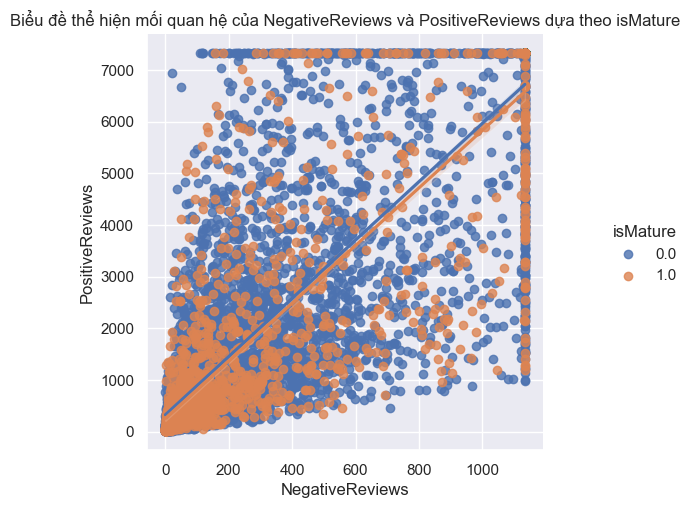

In [53]:
sns.lmplot(x="NegativeReviews", y="PositiveReviews", hue="isMature", data=cleaned_df)
plt.title('Biểu đề thể hiện mối quan hệ của NegativeReviews và PositiveReviews dựa theo isMature')

Text(0.5, 1.0, 'Biểu đề thể hiện mối quan hệ của NegativeReviews và PositiveReviews dựa theo withDLC')

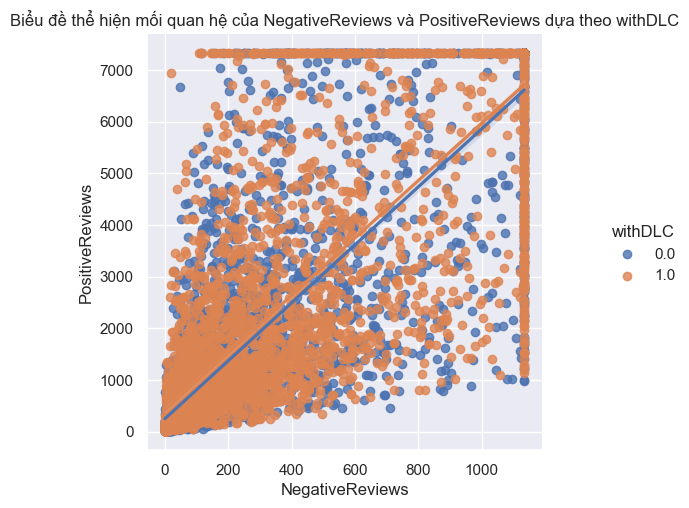

In [54]:
sns.lmplot(x="NegativeReviews", y="PositiveReviews", hue="withDLC", data=cleaned_df)
plt.title('Biểu đề thể hiện mối quan hệ của NegativeReviews và PositiveReviews dựa theo withDLC')

Ta thấy hai đường hồi quy phân loại theo `withDLC` và `isMature` trên mỗi hình sát nhau và gần như là một, do đó những game có **DLC** hay game có **Mature content** không ảnh hưởng quá nhiều khi người chơi đánh giá game.

##### Question 1: Câu hỏi đặt ra là đối với những game có downloadable content (withDLC) thì giá tiền gốc cần để mua game đó có nhiều hơn những game không kèm theo downloadable content hay không và Original Price cao thấp có mối quan hệ như thế nào với PositiveReviews-thứ có liên hệ trực tiếp đến Rating của game? 

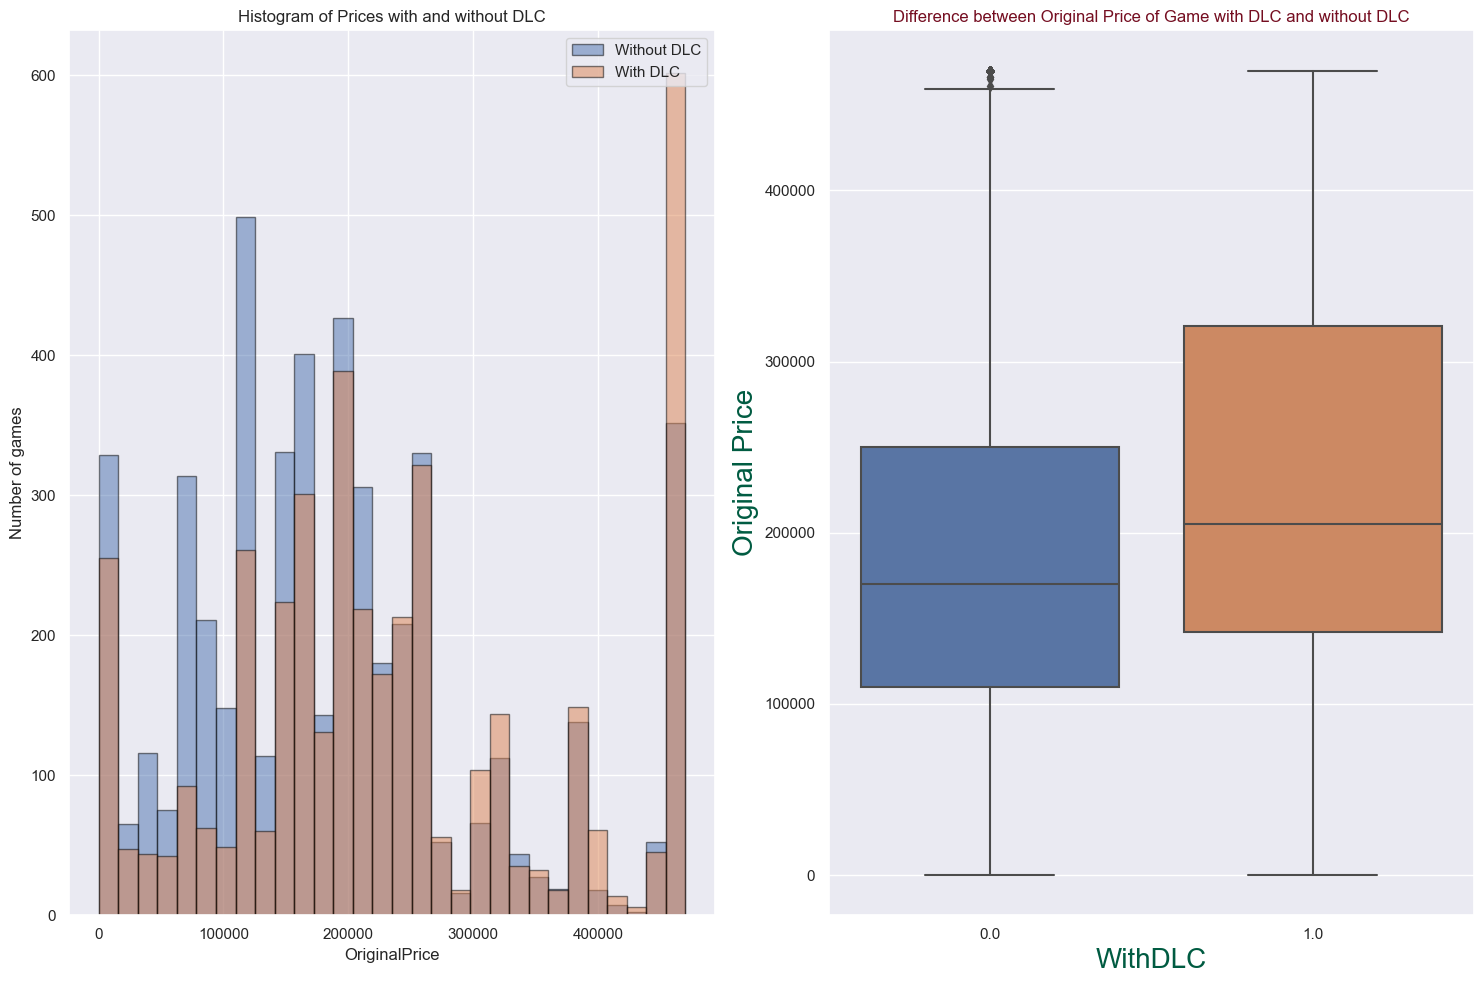

In [55]:
df_with_dlc = cleaned_df[cleaned_df['withDLC'] == 1]
df_without_dlc = cleaned_df[cleaned_df['withDLC'] == 0]

fig, axs = plt.subplots(1, 2, figsize = (15, 10))
axs[0].hist(df_without_dlc['OriginalPrice'], bins = 30, alpha = 0.5, label = 'Without DLC', edgecolor = 'black')
axs[0].hist(df_with_dlc['OriginalPrice'], bins = 30, alpha = 0.5, label = 'With DLC', edgecolor = 'black')
axs[0].legend(loc = 'upper right')
axs[0].set_title('Histogram of Prices with and without DLC')
axs[0].set_xlabel('OriginalPrice')
axs[0].set_ylabel('Number of games')

sns.boxplot(x = 'withDLC', y = 'OriginalPrice', data = cleaned_df, ax = axs[1])
axs[1].set_title('Difference between Original Price of Game with DLC and without DLC', color = '#750E21')
axs[1].set_xlabel('WithDLC', color = '#005B41', fontsize = 20)
axs[1].set_ylabel('Original Price', color = '#005B41', fontsize = 20)

plt.tight_layout()
plt.show()

**Nhận xét:**
- Ở biểu đồ histogram:
    - Trong khoảng giá từ 0 đến 250.000 thì số lượng game có kèm DLC ít hơn nhiều các game không có kèm DLC
    - Từ mốc giá 250.000 trở đi thì ngược lại, ta nhận thấy sự nổi bật hơn hẳn các game có kèm DLC với các game không có kèm DLC và sự khác biệt này càng rõ ràng khi giá tiền càng tăng
- Ở biểu đồ boxplot: Nhìn biểu đổ boxplot, ta càng củng cố thêm nhận định trên

In [56]:
print(df_with_dlc[['withDLC', 'OriginalPrice']].describe())
print(df_without_dlc[['withDLC', 'OriginalPrice']].describe())

       withDLC  OriginalPrice
count   4167.0    4167.000000
mean       1.0  235766.762995
std        0.0  135408.125698
min        1.0       0.000000
25%        1.0  142000.000000
50%        1.0  205000.000000
75%        1.0  321000.000000
max        1.0  470000.000000
       withDLC  OriginalPrice
count   5102.0    5102.000000
mean       0.0  188543.317248
std        0.0  120723.934235
min        0.0       0.000000
25%        0.0  110000.000000
50%        0.0  170000.000000
75%        0.0  250000.000000
max        0.0  470000.000000


<Figure size 2000x1000 with 0 Axes>

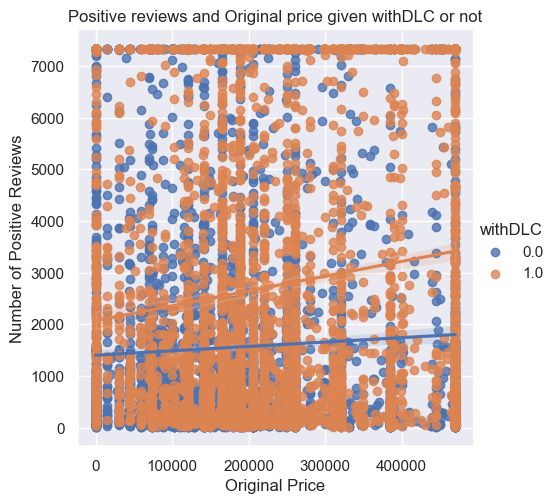

In [57]:
plt.figure(figsize = (20, 10))
sns.lmplot(x = 'OriginalPrice', y = 'PositiveReviews', hue = 'withDLC', data = cleaned_df)

plt.xlabel('Original Price')
plt.ylabel('Number of Positive Reviews')
plt.title('Positive reviews and Original price given withDLC or not')
plt.show()

**Kết luận:**
- Nhìn vào 2 biểu đồ boxplot và bảng dữ liệu trên, ta có thể thấy giá tiền gốc của game có kèm theo downloadable content có xu hướng cao hơn những game không có mặc dù game không có DLC có số lượng nhiều hơn cùng với sự không liên quan mật thiết gì giữa withDLC và PositiveReviews. 

=> Các nhà phát hành game có thể phát triển game cùng với downloadable content để có thể tăng giá thành sản phẩm với mục đích thu lợi nhuận cao hơn mà không ảnh hưởng tiêu cực đến đánh giá của người dùng về game

### Question 2: Mỗi thể loại game thường được giảm giá như thế nào?
Thông thường, ta hay cho rằng những sản phẩm giảm giá nhiều có nghĩa là những món đó đã cũ hoặc đã lỗi thời, thế còn game thì sao?

Việc mỗi thể loại game giảm giá nhiều hay ít có ảnh hưởng gì tới việc những thể loại game đó có đang là xu hướng trong thị trường game hiện tại hay không? Điều này có quyết định đến việc phát triển một game hay không?

Đầu tiên, ta lấy cột `Genre` và `DiscountPercent`

In [58]:
genre_df = cleaned_df[['Genre', 'DiscountPercent']]
genre_df

,Genre,DiscountPercent
0,"Adventure, RPG, Strategy",0.1
1,"Action, Free to Play",0.0
2,"Action, Adventure, Indie, Early Access",0.0
3,RPG,0.5
4,"Action, RPG",0.4
...,...,...
9264,"Adventure, Casual, Indie, Simulation",0.0
9265,"Adventure, Casual, Indie",0.9
9266,Action,0.7
9267,Action,0.0


Vì `Genre` là một cột đặc biệt, vì mỗi sample có thể có nhiều thể loại, do đó để thể hiện rõ những thể loại nào đang phát triển, ta sẽ chia `Genre` ra thành từng sample:

In [59]:
explode_genre_df = genre_df.assign(Genre=genre_df['Genre'].str.split(', ')).explode('Genre')
explode_genre_df = explode_genre_df.reset_index(drop=True)
explode_genre_df

,Genre,DiscountPercent
0,Adventure,0.1
1,RPG,0.1
2,Strategy,0.1
3,Action,0.0
4,Free to Play,0.0
...,...,...
25232,Indie,0.9
25233,Action,0.7
25234,Action,0.0
25235,Adventure,0.0


Tính trung bình `DiscountPercent` của từng `Genre`

In [60]:
mean_discount_df = explode_genre_df.groupby('Genre')['DiscountPercent'].mean().reset_index()
mean_discount_df = mean_discount_df[mean_discount_df['Genre'] != 'Free to Play']
mean_discount_df.sort_values(by=['DiscountPercent'], inplace=True)

Thể hiện giá trị lên đồ thị:

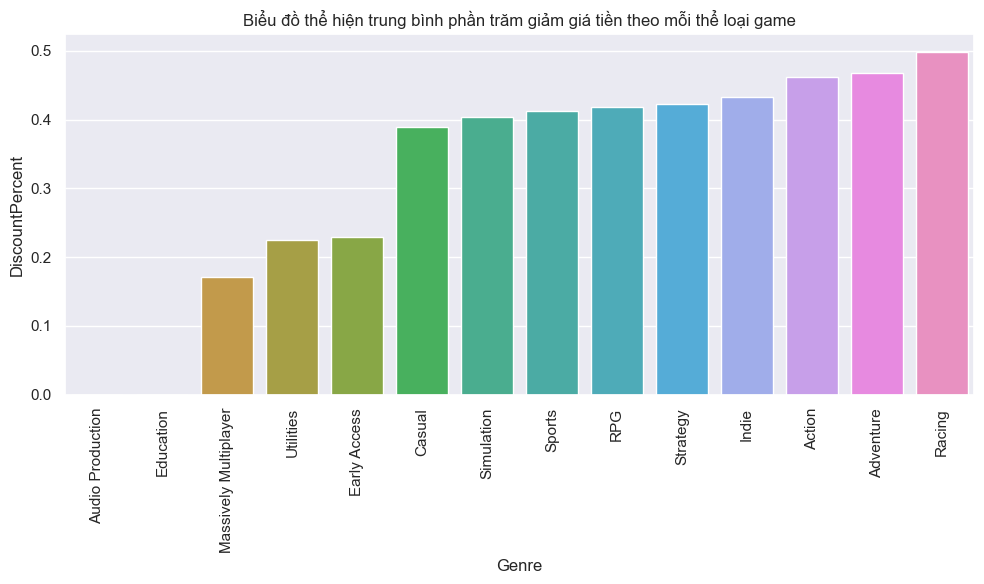

In [61]:
f, ax = plt.subplots(figsize=(10, 6))
sns.barplot(mean_discount_df, x='Genre', y='DiscountPercent', ax=ax)
plt.xticks(rotation=90)
plt.title('Biểu đồ thể hiện trung bình phần trăm giảm giá tiền theo mỗi thể loại game')
plt.tight_layout()

Có vẻ như phần lớn các thể loại game đều có discount trên **30%**, chỉ có một số thể loại có discount thấp (`Massive Multiplayer`, `Utilities`,...) chỉ discount xấp xỉ **20%**, một số thể loại game còn không hề có bất kì động thái giảm giá nào (`Audio Production`, `Education`). 
Ta thấy:
- Những thể loại game mang tính giáo dục và là các toolkit hỗ trợ cho quá trình phát triển game (`Education`, `Utilities`) chứ không phải là một game giải trí đơn thuần
- `Massive Mutliplayer` thường là những game online hỗ trợ đa người chơi, cũng được phần lớn game thủ đón nhận, và là những game khuynh hướng e-sports. tuy nhiên trung bình những game có thể loại này thường discount khá thấp so với những thể loại game thuần túy khác (dưới 20%). Khả năng cao do những game online đa người chơi thường được rất nhiều sự thu hút của game thủ do mang tính cạnh tranh cao, điều này có thể giúp cho game có thể giảm giá thấp hoặc không cần giảm giá vẫn có thể được mua rất nhiều.
- Những thể loại game mang tính giải trí cao hơn lại có lượng discount trung bình lớn hơn khả năng là do những game này rất đa dạng và là những thể loại được nhà phát triển tập trung nhiều nhất, do đó sẽ có vô số những nhà phát triển khác mới nổi, mong muốn game này nhanh chóng tiếp cận đến tay người chơi, do đó có một lượng discount khá cao (khoảng 40% so với giá gốc). những nhà phát triển nổi tiếng và lâu đời để cạnh tranh được những game này cũng sẽ phải giảm giá thành những game của họ, điều này có thể dẫn đến những game này thường giữ được trung bình discount khá lớn.

**Kết luận:** Vậy ta có thể nhận định rằng là những game thuần giải trí sẽ có một lượng discount trung bình khá cân bằng và không lệch nhau quá nhiều, điều này chứng tỏ việc những thể loại game giảm giá nhiều hay ít không ảnh hưởng quá nhiều đến tính tồn tại và xu hướng phát triển của thể loại game trong tương lai.

Đây là chỉ là đánh giá mang tính chủ quan. Vì mỗi game có một hoặc rất nhiều thể loại, có discount khác nhau. Do đó xử lí như này sẽ không đánh giá đúng 100%, tuy nhiên nó cũng cho chúng ta 1 góc nhìn chung về những game có thể loại như vậy thường có lượng discount trung bình như thế nào.

### Question 3: Những game được nhiều sự quan tâm đánh giá từ người chơi, có khuyến mãi như thế nào ??
Ở câu hỏi 2, ta đã tìm hiểu mỗi thể loại game giảm giá nhiều hay ít ảnh hưởng như thế nào đến xu hướng phát triển của game đó. Vậy những game có khuyến mãi lớn có được người dùng quan tâm nhiều hay không?

Ta có thể phân vùng đánh giá game như sau:\
**0% - 19%:** Negative\
**20% - 39%:** Mostly Negative\
**40% - 69%:** Mixed\
**70% - 79%:** Mostly Positive\
**80% - 100%:** Positive

Do data cào về khá chênh lệch về số lượng game được làm theo từng năm, nên ta sẽ lấy năm 2022 và 2023 để đối chiếu và so sánh.

In [62]:
discount_2022 = cleaned_df.loc[(cleaned_df['ReleaseYear'] == 2022), ['Rating', 'DiscountPercent']]
discount_2023 = cleaned_df.loc[(cleaned_df['ReleaseYear'] == 2023), ['Rating', 'DiscountPercent']]

def classify_percentage(percentage):
    if percentage >= 0.0 and percentage < 0.2:
        return 'Negative'
    elif percentage >= 0.2 and percentage < 0.4:
        return 'Mostly Negative'
    elif percentage >= 0.4 and percentage < 0.7:
        return 'Mixed'
    elif percentage >= 0.7 and percentage < 0.8:
        return 'Mostly Positive'
    elif percentage >= 0.8 and percentage <= 1.0:
        return 'Positive'
    else:
        return 'Invalid'

discount_2023['Conclusion'] = discount_2023['Rating'].apply(classify_percentage)
discount_2022['Conclusion'] = discount_2022['Rating'].apply(classify_percentage)

Ta tính giá trị trung bình của `DiscountPercent` cho năm 2022 và 2023

In [63]:
mean_2022 = discount_2022.groupby(['Conclusion'])['DiscountPercent'].mean()
mean_2022 = mean_2022.to_frame().rename(columns= {'DiscountPercent': 'MeanDiscountPercent'}).reset_index()
mean_2023 = discount_2023.groupby(['Conclusion'])['DiscountPercent'].mean()
mean_2023 = mean_2023.to_frame().rename(columns= {'DiscountPercent': 'MeanDiscountPercent'}).reset_index()

Tạo đồ thị violinplot để so sánh sự phân bố của từng mức `Conclusion`:

[Text(0.5, 99.24999999999997, 'Rating Conclusion'),
 Text(172.5, 0.5, 'Discount Percent')]

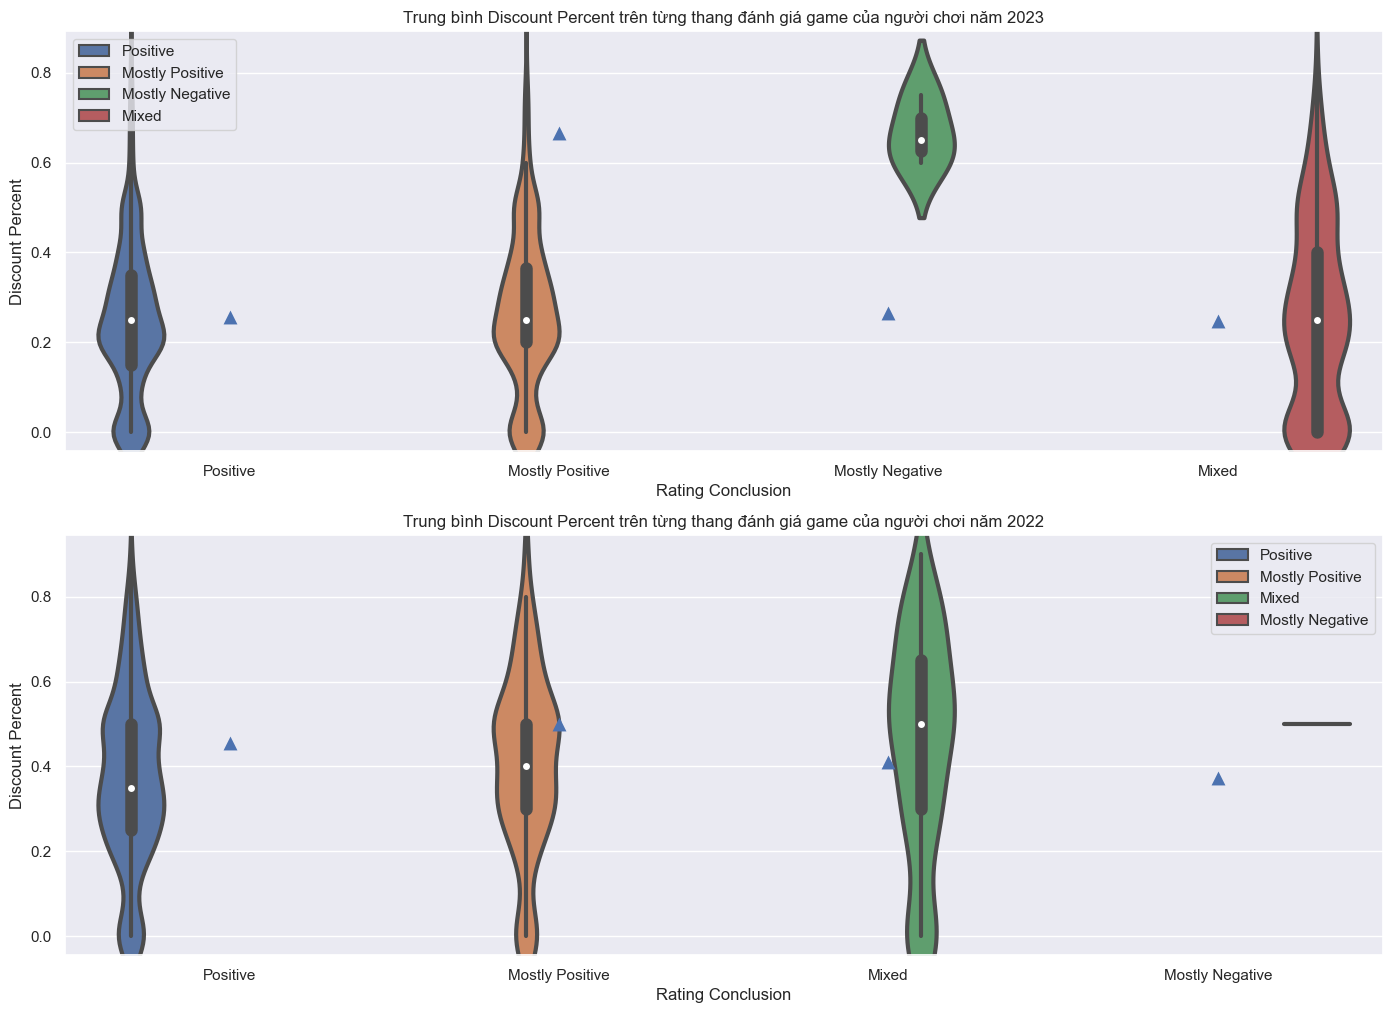

In [77]:
fig, axes = plt.subplots(2, 1, figsize=(17, 12))

sns.violinplot(data = discount_2023, x = 'Conclusion', y = 'DiscountPercent', hue='Conclusion', linewidth=3, ax=axes[0])
sns.violinplot(data = discount_2022, x = 'Conclusion', y = 'DiscountPercent', hue='Conclusion', linewidth=3, ax=axes[1])

sns.swarmplot(data = mean_2023, x = 'Conclusion', y = 'MeanDiscountPercent', ax = axes[0], marker = '^', s = 10, dodge= True)
sns.swarmplot(data = mean_2022, x = 'Conclusion', y = 'MeanDiscountPercent', s = 10,ax = axes[1], marker = '^', dodge= True)
axes[0].set_title('Trung bình Discount Percent trên từng thang đánh giá game của người chơi năm 2023')
axes[1].set_title('Trung bình Discount Percent trên từng thang đánh giá game của người chơi năm 2022')
axes[0].set(xlabel = 'Rating Conclusion', ylabel = 'Discount Percent')
axes[1].set(xlabel = 'Rating Conclusion', ylabel = 'Discount Percent')

Dựa vào biểu đồ, ta thấy sự biến động của các kết luận đánh giá dựa vào DiscountPercent trung bình trong năm 2023 và năm 2022 là có khác nhau đôi chút:
- Với năm 2023, theo mỗi loại đánh giá, lượng người chơi đánh giá nhiều nhất cũng là nơi mà tại đó cũng chính là giá trị trung bình của `DiscountPercent`, và giá trị trung bình nằm ở khoảng xấp xỉ **25%**. Trong từng loại đánh giá, loại có phân bố lạ nhất và không tương đồng với các loại đánh giá khác là `Mostly Negative`, khi mà các giá trị phân bố tập trung ở phạm vi có discount **60%-80%**.

- Trước đó, năm 2022 có giá trị trung bình `DiscountPercent` nằm ở khoảng **40%**, trùng với giá trị median của từng `Conclusion`. Tuy nhiên, số lượng người chơi đánh giá game nhiều nhất không nằm ngay trong khoảng này, mà nó có thể nằm bất kì đâu (như `Mixed` thì nhiều nhất khi `DiscountPercent` khoảng **60%**, `Mostly Positive` là **45%** và `Positive` là khoảng **30%**), số lượng người chơi đánh giá game cũng trải rộng hơn chứ không tập trung vào một số `DiscountPercent` nhất định, và số lượng người chơi đánh giá cũng tăng dần trong khoảng trung bình của nó **(20% - 40%)**. Tương tự như 2023, `Mostly Negative` còn lạ hơn khi mà nó không hề có phân bố trải rộng mà tập trung ở khoảng discount **50%**.
- Tại sao `Mostly Negative` ở cả 2 biểu đồ đều lạ như vậy? Khả năng là do lượng data thu thập được bị lệch khá nhiều khiến cho lượng game có đánh giá `Mostly Negative` khiêm tốn hơn rất nhiều so với những đánh giá khác. Trong trường hợp này, ta sẽ tạm thời chỉ xét những đánh giá thang mức trung bình trở lên để mang lại tầm nhìn tích cực cho các nhà phát triển tìm ra hướng đi tốt về điều chỉnh giá thành cho game của mình.

Vậy với sự khác biệt giữa sự phân bố của từng mức đánh giá trong năm 2023 và 2022 có ý nghĩa gì không?\
**Dự đoán:** nhìn vào biểu đồ, ta có thể giúp thấy thường những vùng mà có chứa `DiscountPercent` trung bình là tập trung nhiều lượng người chơi đánh giá nhất hoặc đó là vùng cũng có một số lượng lớn người chơi đánh giá. Điều này có thể giúp cho các nhà phát triển có thể đưa ra được một chiến lược giảm giá phù hợp để vừa có thể giữ được lợi nhuận cho game và đạt được một số lượng người chơi tốt.

### Question 4: Thể loại game nào được các nhà phát triển ưa chuộng và mang lại Rating cao cho game ???
Mục tiêu: Nhận biết xu hướng ưa chuộng của thị trường người chơi game để thay đổi thích nghi, nhằm đạt lợi nhuận cao nhất có thể với các dòng game hiện hành

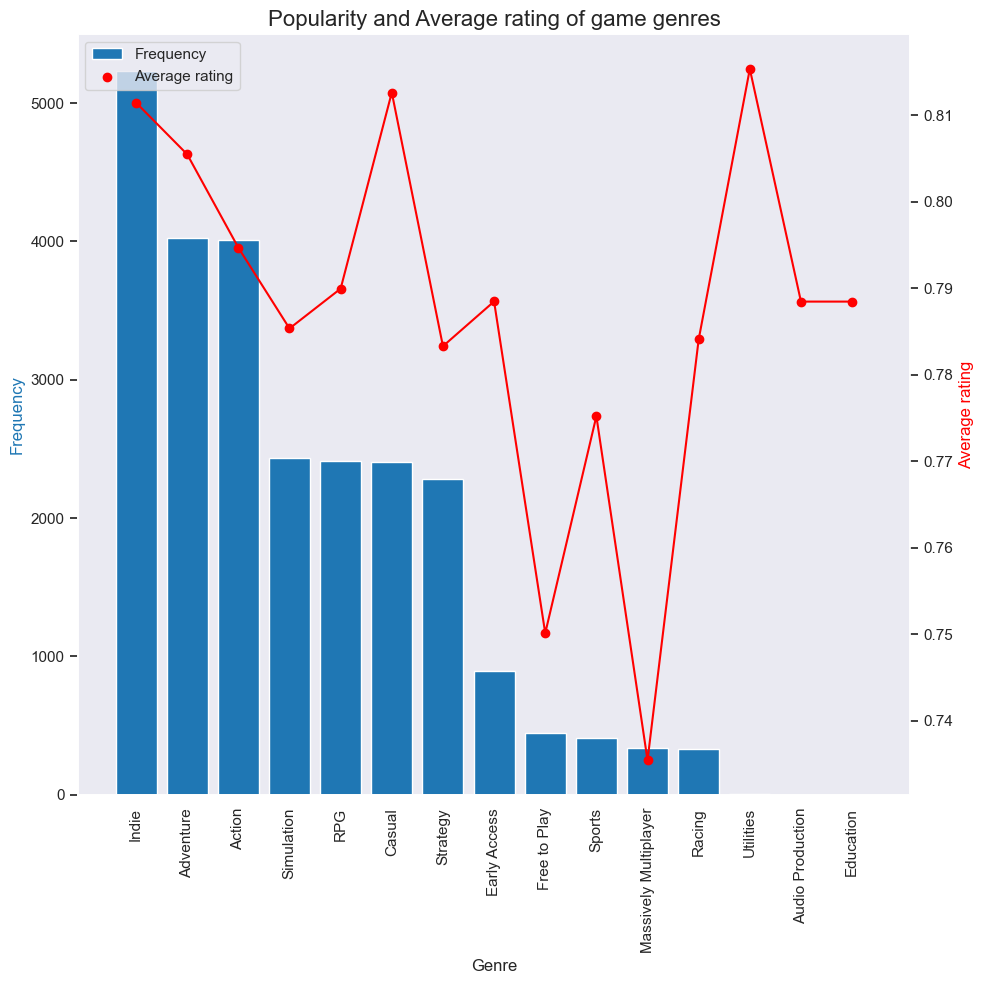

In [66]:
copy_df = cleaned_df.copy()
copy_df['Genre'] = copy_df['Genre'].str.split(', ')
genre_counts = copy_df.explode('Genre')['Genre'].value_counts()
average_ratings_genre = copy_df.explode('Genre').groupby('Genre')['Rating'].mean()

average_ratings_genre = average_ratings_genre.reindex(genre_counts.index)

# bar plot to visualize the popularity of each genre
fig, ax = plt.subplots(figsize = (10, 10))
bars = ax.bar(genre_counts.index, genre_counts.values, color = '#1f77b4')
ax.set_xlabel('Genre')
ax.set_xticklabels(genre_counts.index, rotation=90)
ax.set_ylabel('Frequency', color = '#1f77b4')
ax.grid(False)

ax1 = ax.twinx()
scatters = ax1.scatter(average_ratings_genre.index, average_ratings_genre.values, color = 'red')
ax1.plot(average_ratings_genre.index, average_ratings_genre.values, color = 'red')
ax1.set_ylabel('Average rating', color = 'red')
ax1.grid(False)

plt.title('Popularity and Average rating of game genres', fontsize = 16)
plt.legend([bars, scatters], ['Frequency', 'Average rating'], loc='upper left')
plt.tight_layout()
plt.show()

**Nhận xét:** 
- Game thể loại Indie có mặt hầu hết ở các game với trung bình rating tương đối cao là 0.81 
- Kế đến là các game thể loại Adventure, Action khá được ưa chuộng với trung bình rating cũng khá tích cực lần lượt là 0.8 và 0.795
- Thể loại game Massively Multiplayer có mặt ở trong khá ít game (337 games) và nhận được phản hồi không cao từ người dùng với trung bình rating là 0.735
- Các game thể loại Casual, RPG, Sports, Racing có rating khá tích cực cùng với sự phổ biến tương đối
- Trung bình rating các game mang thể loại Utilities tương đối cao 0.815 nhưng chưa được các nhà phát triển thực sự quan tâm khi chỉ xuất hiện trong 2 games, tương tự với game thuộc thể loại Audio Production và Education

=> Kết luận: 
- Các nhà phát triển, phát hành game nên đẩy mạnh gia công các game thuộc thể loại Massively Multiplayer khi cộng đồng người chơi game ngày càng lớn và sự tương tác giữa những người chơi trong game (có thể chơi cùng nhau) trở nên tất yếu 
- Các thể loại game như Audio Production, Education cần được chú trọng hơn khi mang lại nhiều phản hồi tích cực, đây có thể là tiềm năng có thể khai thác để nâng cao lợi nhuận đáng kể

In [67]:
print(average_ratings_genre)
print(genre_counts)

Genre
Indie                    0.811456
Adventure                0.805477
Action                   0.794688
Simulation               0.785349
RPG                      0.789952
Casual                   0.812624
Strategy                 0.783299
Early Access             0.788473
Free to Play             0.750124
Sports                   0.775214
Massively Multiplayer    0.735441
Racing                   0.784080
Utilities                0.815346
Audio Production         0.788456
Education                0.788456
Name: Rating, dtype: float64
Genre
Indie                    5235
Adventure                4025
Action                   4012
Simulation               2437
RPG                      2415
Casual                   2406
Strategy                 2281
Early Access              896
Free to Play              449
Sports                    407
Massively Multiplayer     337
Racing                    333
Utilities                   2
Audio Production            1
Education                   1

### Câu hỏi 5: Thị trường phát triển game tiềm năng trong những năm gần đây?

Ta sẽ xem xét các ngôn ngữ phát triển trong game qua từng năm và xu hướng phát triển thông qua biểu đồ đường thẳng để đánh giá đâu là thị trường tiềm năng.

Đầu tiên, ta xem xét tất cả các giá trị trong cột `Languages` và phân bố. Dựa vào `TotalReviews` - một cách tương đối để xem xét số lượng người chơi nhiều hay ít của một game được hỗ trợ ngôn ngữ đó.

In [68]:
# Copy df
df_copy = cleaned_df.copy()

# Split the 'Genre' column into separate genres
df_copy['Languages'] = df_copy['Languages'].str.split(', ')

# Explode the dataframe on the 'Genre' column so each genre has its own row
data_exploded = df_copy.explode('Languages')

lang_review_df = data_exploded.groupby('Languages')['TotalReviews'].sum()
lang_review_df

Languages
#lang_english (full audio)       229.0
#lang_german;                   1522.0
#lang_slovakian                 2307.0
Afrikaans                     101348.0
Albanian                       85777.0
                                ...   
Welsh                          97011.0
Wolof                          84346.0
Xhosa                          85137.0
Yoruba                         85137.0
Zulu                           85137.0
Name: TotalReviews, Length: 106, dtype: float64

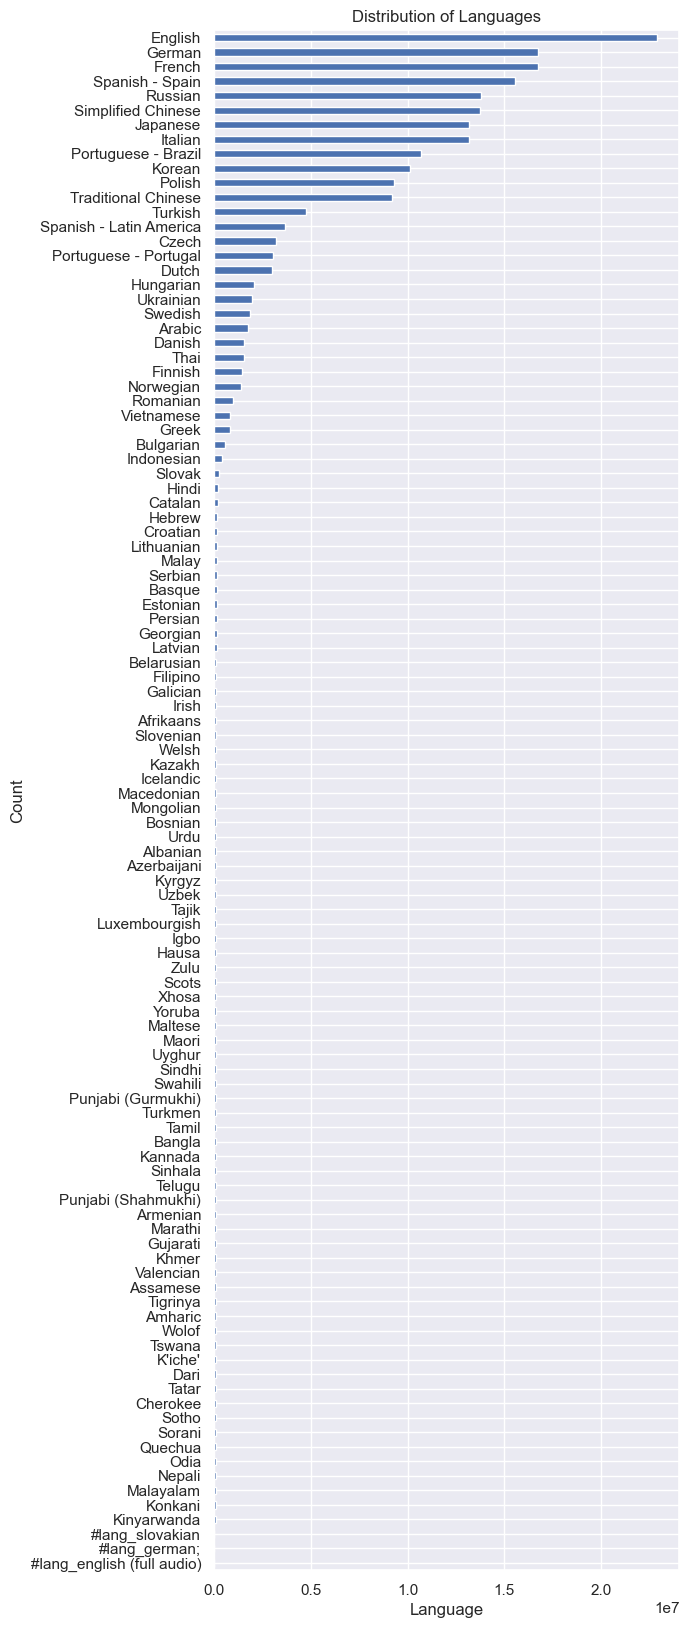

In [69]:
# Plot the distribution of languages
plt.figure(figsize=(6, 20))
data_exploded.groupby('Languages')['TotalReviews'].sum().sort_values().plot(kind='barh')
plt.title('Distribution of Languages')
plt.xlabel('Language')
plt.ylabel('Count')
plt.show()

Vì ngôn ngữ `English` là ngôn ngữ phổ biến, nếu ta đánh giá thị trường dựa trên ngôn ngữ game hỗ trợ chỉ đúng một cách tương đối. Vì vậy ta xem xét thử nếu `English` xuất hiện ở tất cả các game, ta sẽ loại ra để có cái nhìn khách quan hơn.

In [70]:
# Reset index
data_exploded = data_exploded.reset_index(drop=True)

# Kiểm tra các game KHÔNG có ngôn ngữ English
english_games = data_exploded[data_exploded['Languages'] == 'English']
df_copy[~df_copy['Title'].isin(english_games['Title'])]

,Title,Genre,withDLC,isMature,Developer,Publisher,Languages,PositiveReviews,TotalReviews,NegativeReviews,OriginalPrice,DiscountPercent,DiscountedPrice,ReleaseYear,ReleaseMonth,ReleaseDay,Rating


In [71]:
# Drop các dòng chứa English
data_exploded.drop(english_games.index, inplace=True)

data_exploded

,Title,Genre,withDLC,isMature,Developer,Publisher,Languages,PositiveReviews,TotalReviews,NegativeReviews,OriginalPrice,DiscountPercent,DiscountedPrice,ReleaseYear,ReleaseMonth,ReleaseDay,Rating
1,Baldur's Gate 3,"Adventure, RPG, Strategy",1.0,1.0,Larian Studios,Larian Studios,French,7329.0,8630.0,1134.5,470000.0,0.10,306875.0,2023,8,3,0.826430
2,Baldur's Gate 3,"Adventure, RPG, Strategy",1.0,1.0,Larian Studios,Larian Studios,German,7329.0,8630.0,1134.5,470000.0,0.10,306875.0,2023,8,3,0.826430
3,Baldur's Gate 3,"Adventure, RPG, Strategy",1.0,1.0,Larian Studios,Larian Studios,Spanish - Spain,7329.0,8630.0,1134.5,470000.0,0.10,306875.0,2023,8,3,0.826430
4,Baldur's Gate 3,"Adventure, RPG, Strategy",1.0,1.0,Larian Studios,Larian Studios,Polish,7329.0,8630.0,1134.5,470000.0,0.10,306875.0,2023,8,3,0.826430
5,Baldur's Gate 3,"Adventure, RPG, Strategy",1.0,1.0,Larian Studios,Larian Studios,Russian,7329.0,8630.0,1134.5,470000.0,0.10,306875.0,2023,8,3,0.826430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65317,Mia and the Dragon Princess,"Action, Adventure",0.0,1.0,Wales Interactive,Wales Interactive,Portuguese - Brazil,115.0,170.0,55.0,205000.0,0.35,133250.0,2023,5,3,0.638932
65318,Mia and the Dragon Princess,"Action, Adventure",0.0,1.0,Wales Interactive,Wales Interactive,Russian,115.0,170.0,55.0,205000.0,0.35,133250.0,2023,5,3,0.638932
65319,Mia and the Dragon Princess,"Action, Adventure",0.0,1.0,Wales Interactive,Wales Interactive,Simplified Chinese,115.0,170.0,55.0,205000.0,0.35,133250.0,2023,5,3,0.638932
65320,Mia and the Dragon Princess,"Action, Adventure",0.0,1.0,Wales Interactive,Wales Interactive,Turkish,115.0,170.0,55.0,205000.0,0.35,133250.0,2023,5,3,0.638932


Ta thấy rằng có rất nhiều ngôn ngữ được hỗ trợ, tuy nhiên phần lớn là các ngôn ngữ chỉ xuất hiện trong một vài game. Nên ta chỉ lấy **top 10** ngôn ngữ xuất hiện nhiều nhất để phân tích.

In [72]:
# top 10 ngôn ngữ và số lần xuất hiện trong các games
top_10_lang = lang_review_df.nlargest(10)
top_10_lang

# DataFrame
top_10_lang_df = data_exploded[data_exploded['Languages'].isin(top_10_lang.index)]
top_10_lang_df

,Title,Genre,withDLC,isMature,Developer,Publisher,Languages,PositiveReviews,TotalReviews,NegativeReviews,OriginalPrice,DiscountPercent,DiscountedPrice,ReleaseYear,ReleaseMonth,ReleaseDay,Rating
1,Baldur's Gate 3,"Adventure, RPG, Strategy",1.0,1.0,Larian Studios,Larian Studios,French,7329.0,8630.0,1134.5,470000.0,0.10,306875.0,2023,8,3,0.826430
2,Baldur's Gate 3,"Adventure, RPG, Strategy",1.0,1.0,Larian Studios,Larian Studios,German,7329.0,8630.0,1134.5,470000.0,0.10,306875.0,2023,8,3,0.826430
3,Baldur's Gate 3,"Adventure, RPG, Strategy",1.0,1.0,Larian Studios,Larian Studios,Spanish - Spain,7329.0,8630.0,1134.5,470000.0,0.10,306875.0,2023,8,3,0.826430
5,Baldur's Gate 3,"Adventure, RPG, Strategy",1.0,1.0,Larian Studios,Larian Studios,Russian,7329.0,8630.0,1134.5,470000.0,0.10,306875.0,2023,8,3,0.826430
6,Baldur's Gate 3,"Adventure, RPG, Strategy",1.0,1.0,Larian Studios,Larian Studios,Simplified Chinese,7329.0,8630.0,1134.5,470000.0,0.10,306875.0,2023,8,3,0.826430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65316,Mia and the Dragon Princess,"Action, Adventure",0.0,1.0,Wales Interactive,Wales Interactive,Korean,115.0,170.0,55.0,205000.0,0.35,133250.0,2023,5,3,0.638932
65317,Mia and the Dragon Princess,"Action, Adventure",0.0,1.0,Wales Interactive,Wales Interactive,Portuguese - Brazil,115.0,170.0,55.0,205000.0,0.35,133250.0,2023,5,3,0.638932
65318,Mia and the Dragon Princess,"Action, Adventure",0.0,1.0,Wales Interactive,Wales Interactive,Russian,115.0,170.0,55.0,205000.0,0.35,133250.0,2023,5,3,0.638932
65319,Mia and the Dragon Princess,"Action, Adventure",0.0,1.0,Wales Interactive,Wales Interactive,Simplified Chinese,115.0,170.0,55.0,205000.0,0.35,133250.0,2023,5,3,0.638932


Tạo DataFrame `lang_df` lưu các ngôn ngữ và số lượng game có hỗ trợ ngôn ngữ đó từ năm 2013 đến 2023.

In [73]:
# Filter the data to include only games released from 2013 onwards
top_10_lang_df = top_10_lang_df[(top_10_lang_df['ReleaseYear'] >= 2017) & (top_10_lang_df['ReleaseYear'] <= 2023)]

# Create lang_df which stores each language and the number of Total review that support that language for each year
lang_df = top_10_lang_df.groupby(['ReleaseYear', 'Languages'])['TotalReviews'].sum().reset_index()

lang_df

,ReleaseYear,Languages,TotalReviews
0,2017,French,1376751.0
1,2017,German,1364842.0
2,2017,Italian,1109393.0
3,2017,Japanese,1126290.0
4,2017,Korean,795820.0
...,...,...,...
58,2023,Korean,1293649.0
59,2023,Portuguese - Brazil,1299165.0
60,2023,Russian,1254018.0
61,2023,Simplified Chinese,1726551.0


Vẽ biểu đồ thể hiện xu hướng và kết luận

In [74]:
# Pivot the DataFrame to have years as columns, languages as index, and number of games as values
pivot_df = lang_df.pivot(index='Languages', columns='ReleaseYear', values='TotalReviews').fillna(0)

# Reset the index
pivot_df.reset_index(inplace=True)

# Melt the DataFrame to have one row per year-language combination
melted_df = pivot_df.melt(id_vars='Languages', var_name='Year', value_name='TotalReviews')

# Plot a line chart for each language using Plotly
fig = px.line(melted_df, x='Year', y='TotalReviews', color='Languages', title='Xu hướng phát triển thị trường game qua các năm')
fig.show()

**Nhận xét:**
- Nhìn chung thị trường game của top 10 ngôn ngữ đều phát triển trong những năm gần đây. Xu hướng phát triển trò chơi điện tử được săn đón ở các quốc gia tăng khá đồng đều:
    - Tất cả các ngôn ngữ có số lượng người chơi đạt đỉnh cao vào năm 2021 (có thể nguyên nhân một phần là do đại dịch năm 2020).
    - Nhưng đồ thị tụt dốc ở giai đoạn 2021 - 2022 và phát triển đều ở giai đoạn 2022 - 2023.
- Ngôn ngữ Trung - giản thể dẫn đầu từ 2019 và tăng vượt xa đến hiện nay, chứng tỏ thị trường Trung Quốc lục địa đã thành công trong xu thế phát triển game online và bằng chứng cũng cho thấy trên nền tảng Steam Game có nhiều game ngôn ngữ Trung.
- Ngôn ngữ Nhật, Đức, Pháp cũng phát triển khá mạnh (hơn 1.5M người đánh giá vào năm 2023).
- Giai đoạn năm 2022 - 2023 ở Nga có vẻ số lượng game hỗ trợ không nhiều, dẫn đến số lượng người chơi cũng giảm.
- Sự phát triển vượt bậc của ngô ngữ Bồ Đào Nha - thị trường Brazil hẳn sẽ còn mạnh mẽ sau này khi số liệu năm 2023 hơn hẳn năm 2022 (từ 1.14M người đánh giá đến 1.29M người đánh giá).